Analísis de la húmedad de suelo (SMAP) en diferentes coberturas vegetales

In [73]:
import ee
import geemap
import pycrs
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Asegúrate de importar este módulo
import pandas as pd  # También importamos pandas para manejar fechas
ee.Initialize(project='ee-lizethreyes')

In [47]:
#Carga la colección de imágenes SMAP
collection = ee.ImageCollection("NASA_USDA/HSL/SMAP10KM_soil_moisture").select('ssm')

In [48]:
shp_path = '/Volumes/Climate - Datos/Carbono/data/raw/USV_SVI_xCuencas/Cuenca_Alta_Pastizal.shp'
gdf = gpd.read_file(shp_path)

In [49]:
geojson_path = '/Volumes/Climate - Datos/Carbono/data/processed/Cuenca_Alta_Pastizal.geojson'
gdf.to_file(geojson_path, driver='GeoJSON')

In [50]:
print(f'Archivo GeoJSON guardado en: {geojson_path}')

Archivo GeoJSON guardado en: /Volumes/Climate - Datos/Carbono/data/processed/Cuenca_Alta_Pastizal.geojson


In [51]:
geojson_path = '/Volumes/Climate - Datos/Carbono/data/processed/Cuenca_Alta_Pastizal.geojson'
Pastizal_CA = geemap.geojson_to_ee(geojson_path)

# Ahora puedes usar `Pastizal_CA` en tu código
print(Pastizal_CA.getInfo())

{'type': 'FeatureCollection', 'columns': {'AREA': 'Float', 'COV_': 'Integer', 'COV_ID': 'Integer', 'CVE_UNION': 'String', 'DESCRIPCIO': 'String', 'OBJECTID': 'Integer', 'Shape_Area': 'Float', 'Shape_Leng': 'Float', 'USV_SVI': 'Long', 'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'geodesic': False, 'type': 'MultiPolygon', 'coordinates': [[[[-91.63817803059158, 16.07513697429198], [-91.63671477336806, 16.074713360333362], [-91.63508628100703, 16.07427816670406], [-91.633473005175, 16.074165228942206], [-91.64162773103493, 16.07415430937391], [-91.64938574975253, 16.074143630823926], [-91.66672470218322, 16.07411875107954], [-91.67944802360739, 16.074101029039298], [-91.67927961835966, 16.07415292711596], [-91.67773285099025, 16.07484812374196], [-91.671668662179, 16.08038531433084], [-91.66941362204096, 16.0769183505015], [-91.66425809113798, 16.07909050102586], [-91.66459329724285, 16.07730427836981], [-91.66352007958795, 16.076105134044724], [-91.661537132932

In [61]:
def get_mean_sm_with_date(image):
    date = image.get('system:time_start')
    mean_sm = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=Pastizal_CA,
        scale=500,
        maxPixels=1e13
    ).get('ssm')
    
    return ee.Feature(None, {'date': date, 'mean_sm': mean_sm})


In [62]:
# Aplicar la función a la colección
mean_sm_collection = collection.map(get_mean_sm_with_date)

In [63]:
# Convertir a una lista para obtener los valores
mean_sm_list = mean_sm_collection.getInfo()

# Extraer las fechas y valores
dates = []
values = []

for feature in mean_sm_list['features']:
    dates.append(ee.Date(feature['properties']['date']).format('YYYY-MM-dd').getInfo())
    values.append(feature['properties']['mean_sm'])


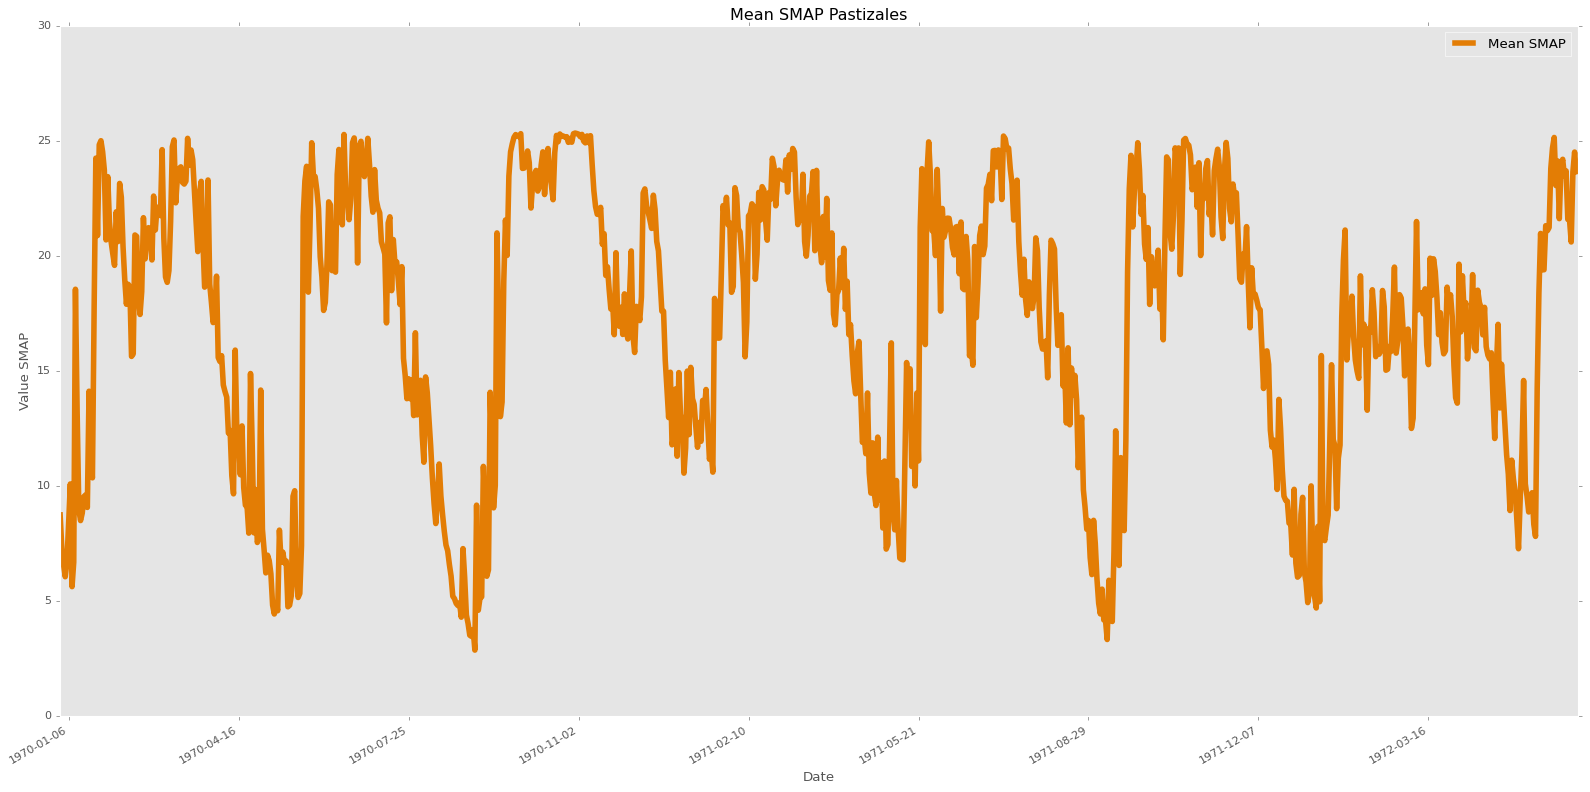

In [76]:
# Graficar con matplotlib
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(dates, values, color='#e37d05', linewidth=5, label='Mean SMAP')
plt.title('Mean SMAP Pastizales')
plt.xlabel('Date')
plt.ylabel('Value SMAP')
plt.xticks(rotation=45)
# Ajustar las etiquetas de fecha
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))  # Cada 100 días
plt.gcf().autofmt_xdate()  # Ajuste automático
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()